# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** Szymon Gładysz

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [6]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from importlib import reload

---

In [2]:
print(main.chebyshev_nodes(2))

[ 1. -1.]


### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [3]:
# ===== Twoja implementacja tutaj =====
reload(main)
print("f_1(2)", main.f_1(2))
print("f_1(-3)", main.f_1(-3))
print("f_2(2)", main.f_2(2))
print("f_2(-3)", main.f_2(-3))
print("f_3(2)", main.f_3(2))
print("f_3(-3)", main.f_3(-3))
print("f_4(2)", main.f_4a(2))
print("f_4(-3)", main.f_4a(-3))
print("f_5(2)", main.f_5(2))
print("f_5(-3)", main.f_5(-3))

f_1(2) 6.0
f_1(-3) 12.0
f_2(2) 4.0
f_2(-3) -9.0
f_3(2) 0.16100792714381187
f_3(-3) 0.274989998984308
f_4(2) [0.2        0.00990099 0.00249377]
f_4(-3) [0.1        0.00442478 0.00110988]
f_5(2) 1.0
f_5(-3) -1.0


---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


In [4]:
print("L_inf", main.L_inf(2,2.0123456789))

L_inf 0.012345678900000046


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


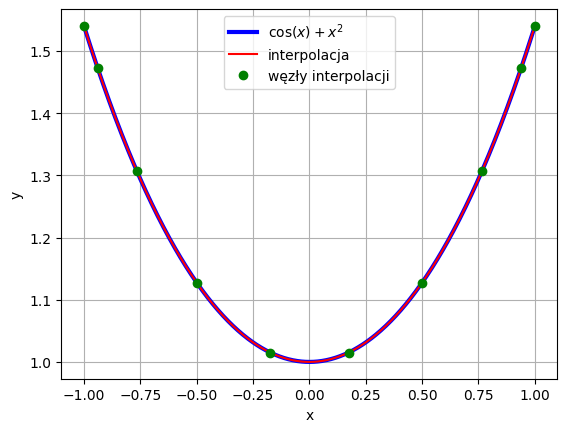

In [ ]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

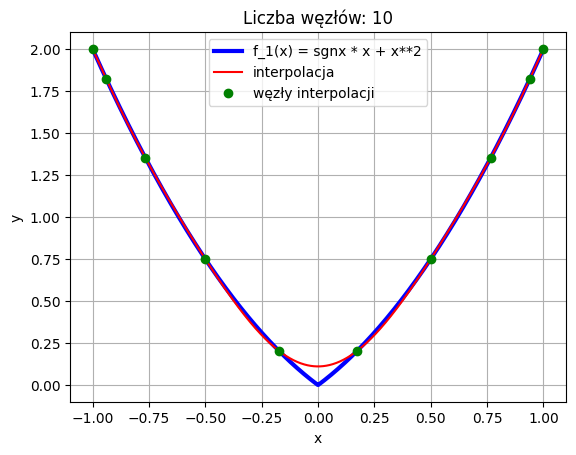

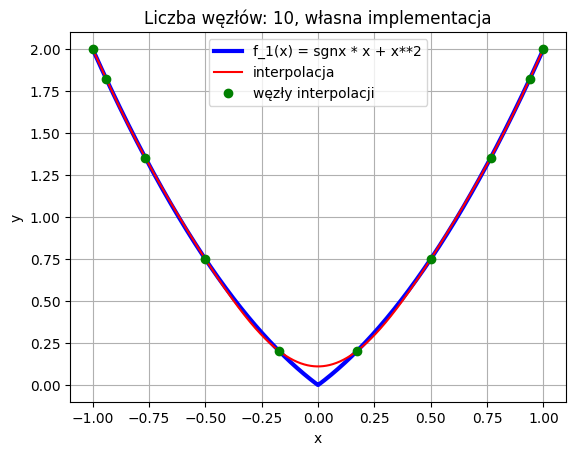

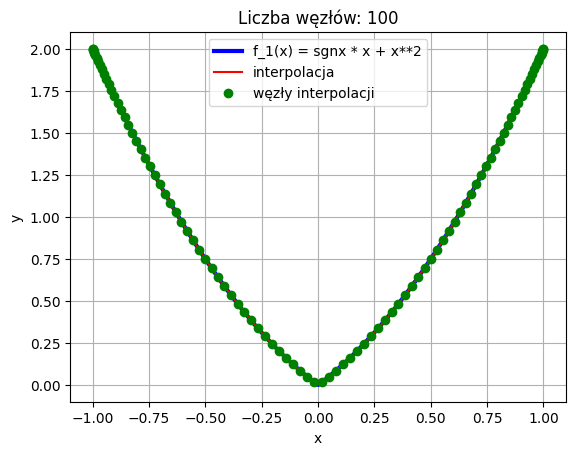

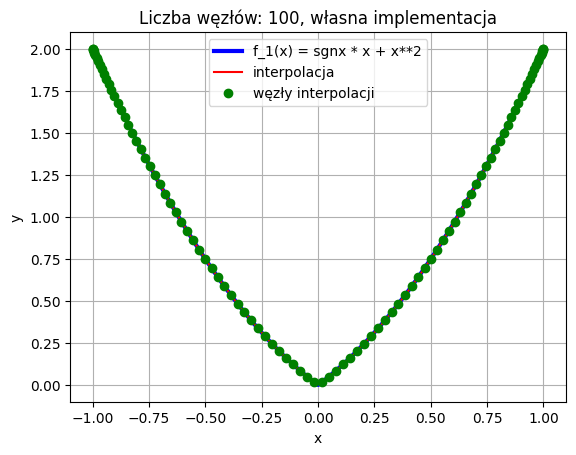

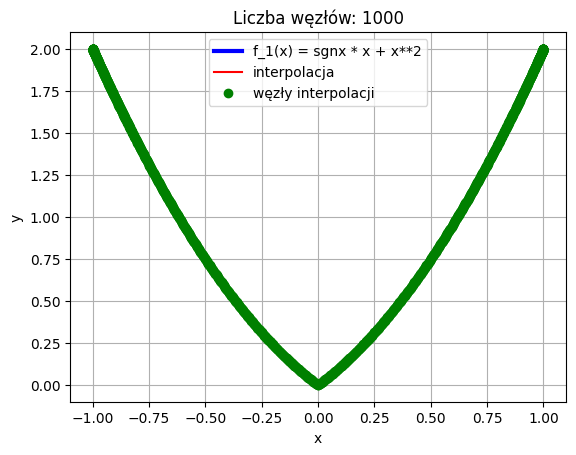

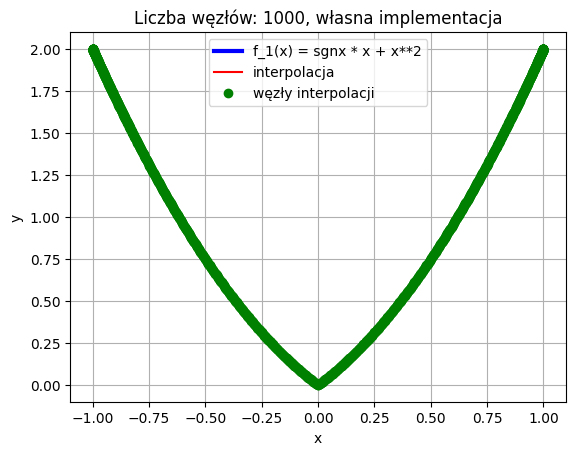

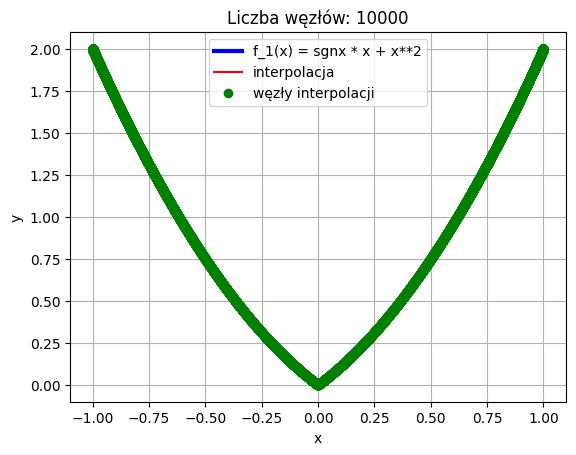

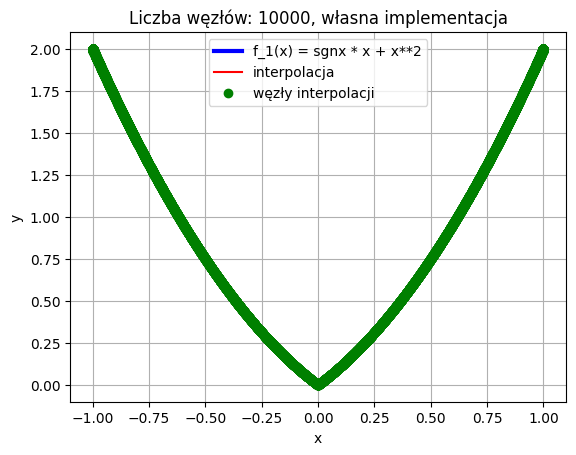

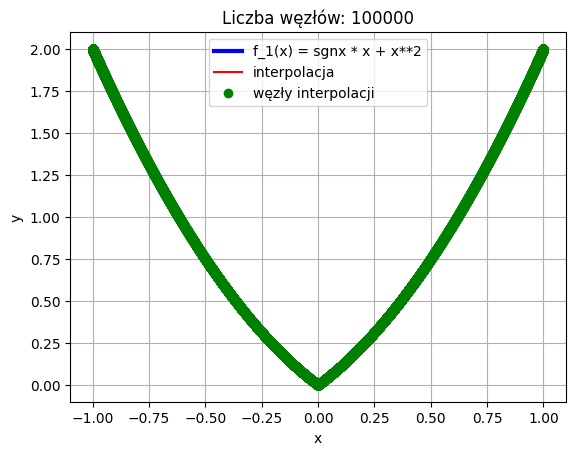

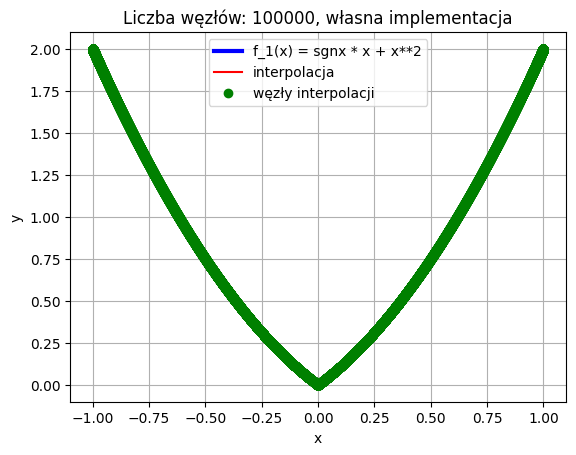

In [6]:
reload(main)
x = np.linspace(-1, 1, 1000)
# Węzły Czebyszewa
n = [1,2,3,4,5]  # Liczba węzłów
for i in n:
    number_cheb = 10**i
    xch = main.chebyshev_nodes(number_cheb)

    # Interpoalcja
    yimp = sp.interpolate.barycentric_interpolate(xch, main.f_1(xch), x)

    plt.plot(x, main.f_1(x), 'b', linewidth=3, label=r'f_1(x) = sgnx * x + x**2')
    plt.plot(x, yimp, 'r', label='interpolacja')
    plt.plot(xch, main.f_1(xch), 'go', label='węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.grid()
    plt.title(f'Liczba węzłów: {number_cheb}')
    plt.show()

    # Interpoalcja
    cheb_nodes = main.chebyshev_nodes(number_cheb)
    cheb_weights = main.bar_cheb_weights(number_cheb)
    y_impemented = main.barycentric_inte(cheb_nodes, main.f_1(cheb_nodes), cheb_weights, x)

    plt.plot(x, main.f_1(x), 'b', linewidth=3, label=r'f_1(x) = sgnx * x + x**2')
    plt.plot(x, y_impemented, 'r', label='interpolacja')
    plt.plot(cheb_nodes, main.f_1(cheb_nodes), 'go', label='węzły interpolacji')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.grid()
    plt.title(f'Liczba węzłów: {number_cheb}, własna implementacja')
    plt.show()

---

Wyliczmy L_inf dla n = 10, 100, 1000, 10000, 100000 dla wersji z własną implementacją.

In [ ]:
nodes_number = [10, 100, 1000, 10000, 100000]
x = np.linspace(-1, 1, 1000)
for nodes in nodes_number:
    cheb_nodes = main.chebyshev_nodes(nodes)
    cheb_weights = main.bar_cheb_weights(nodes)
    y_impemented = main.barycentric_inte(cheb_nodes, main.f_1(cheb_nodes), cheb_weights, x)
    print(f'L_inf dla {nodes} węzłów: ', main.L_inf(main.f_1(x), y_impemented))

L_inf dla 10 węzłów:  0.11011227778498286
L_inf dla 100 węzłów:  0.009124053856609112
L_inf dla 1000 węzłów:  0.00023808283885476292
L_inf dla 10000 węzłów:  1.8533453686731243e-06


Dla wersji wbudowanej

In [ ]:
n = [1,2,3,4,5]  # Liczba węzłów
for i in n:
    number_cheb = 10**i
    xch = main.chebyshev_nodes(number_cheb)

    # Interpoalcja
    yimp = sp.interpolate.barycentric_interpolate(xch, main.f_1(xch), x)
    print(f'L_inf dla {number_cheb} węzłów (scipy): ', main.L_inf(main.f_1(x), yimp))

L_inf dla 10 węzłów (scipy):  0.11011227778498284
L_inf dla 100 węzłów (scipy):  0.00912405385660919
L_inf dla 1000 węzłów (scipy):  0.00023808283885501554
L_inf dla 10000 węzłów (scipy):  1.8533453684254925e-06
L_inf dla 100000 węzłów (scipy):  2.2337219209717096e-09


Wartości L_inf są podobne, jednak są nieznacznie mniejsze dla wersji wbudowanej do biblioteki sp.

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

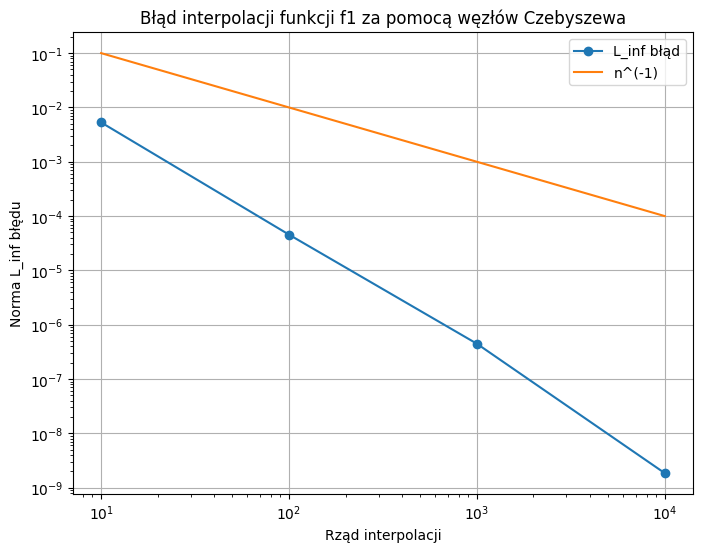

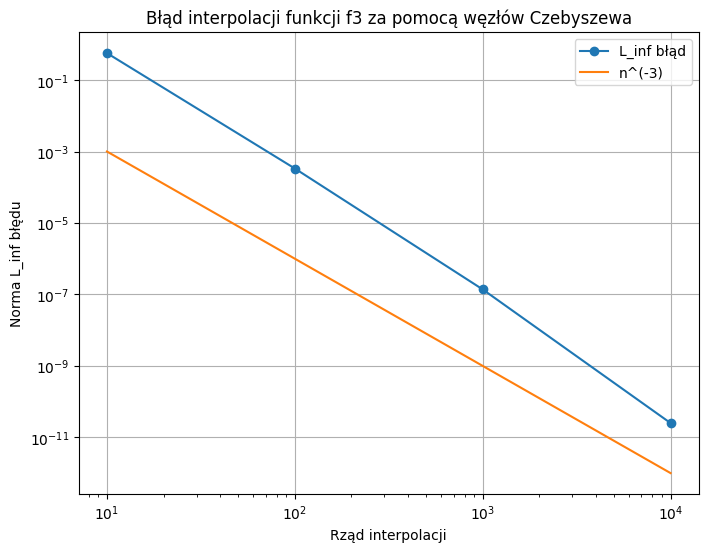

In [ ]:
reload(main)

x = np.linspace(-1, 1, 1000)
n_walues = [10**k for k in [1,2,3,4,5]]
fun = [(main.f_2, 1), (main.f_3, 3)]

for func, order in fun:
    y_fun = func(x)
    L_inf_errors = []
    used_n = []
    
    for i in n_walues:
        x_cheb = main.chebyshev_nodes(i)
        y_cheb = func(x_cheb)
        w_cheb = main.bar_cheb_weights(i)
        y_interpolated = main.barycentric_inte(x_cheb, y_cheb, w_cheb, x)
        L_error = main.L_inf(y_fun, y_interpolated)
        L_inf_errors.append(L_error)
        used_n.append(i)
        if L_error < 1e-14:
            break
    
    plt.figure(figsize=(8, 6))
    plt.loglog(used_n, L_inf_errors, marker='o', label="L_inf błąd")
    n_array = np.array(used_n, dtype=float)
    plt.loglog(n_array, n_array**(-order), label=f"n^(-{order})")
    plt.xlabel("Rząd interpolacji")
    plt.ylabel("Norma L_inf błędu")
    plt.title(f"Błąd interpolacji funkcji f{order} za pomocą węzłów Czebyszewa")
    plt.legend()
    plt.grid()
    plt.show()    
    

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

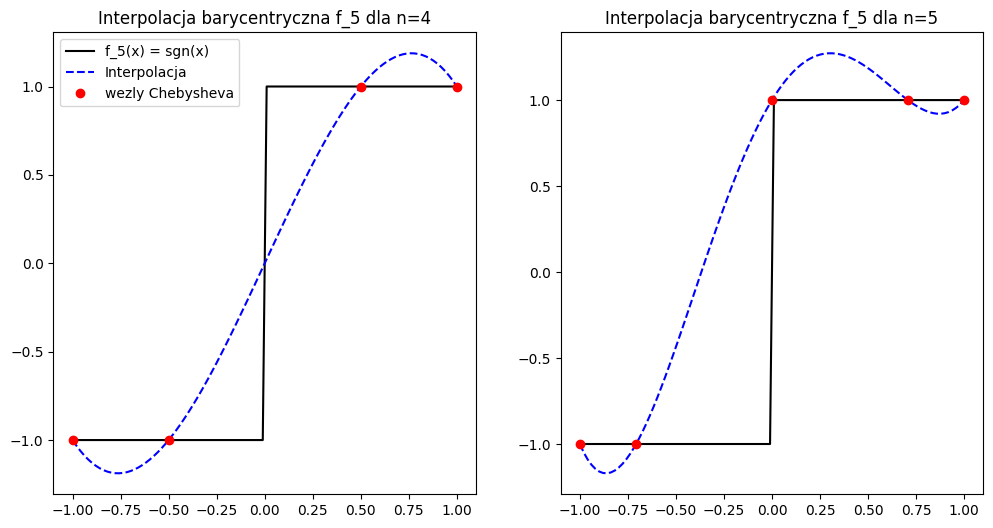

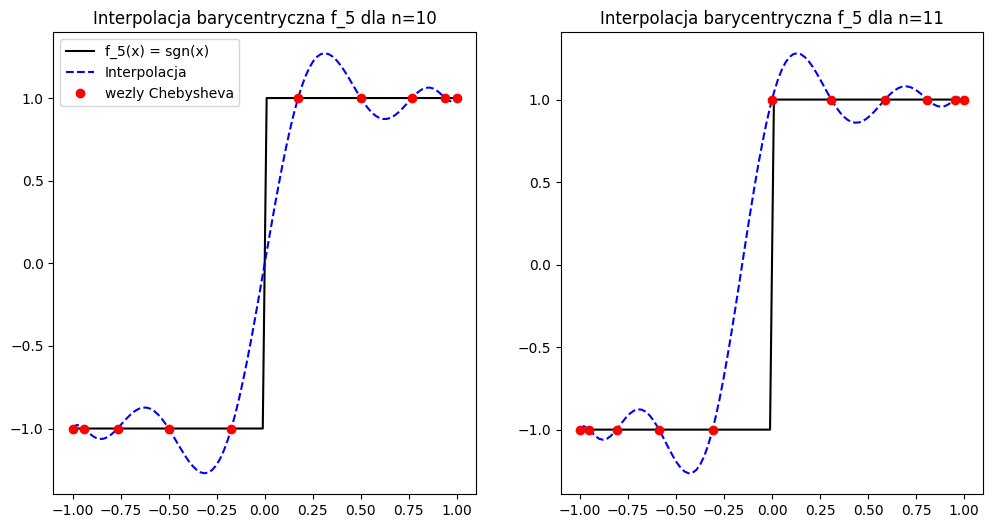

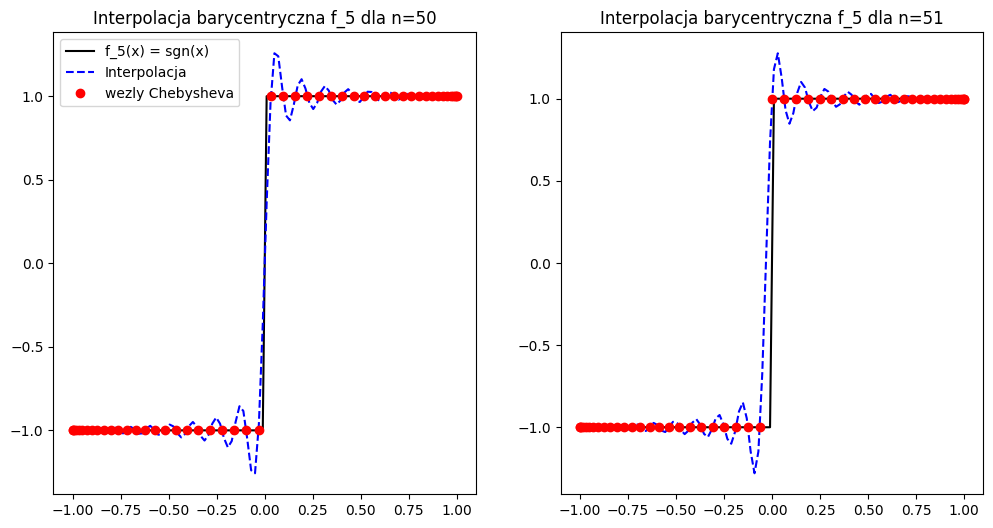

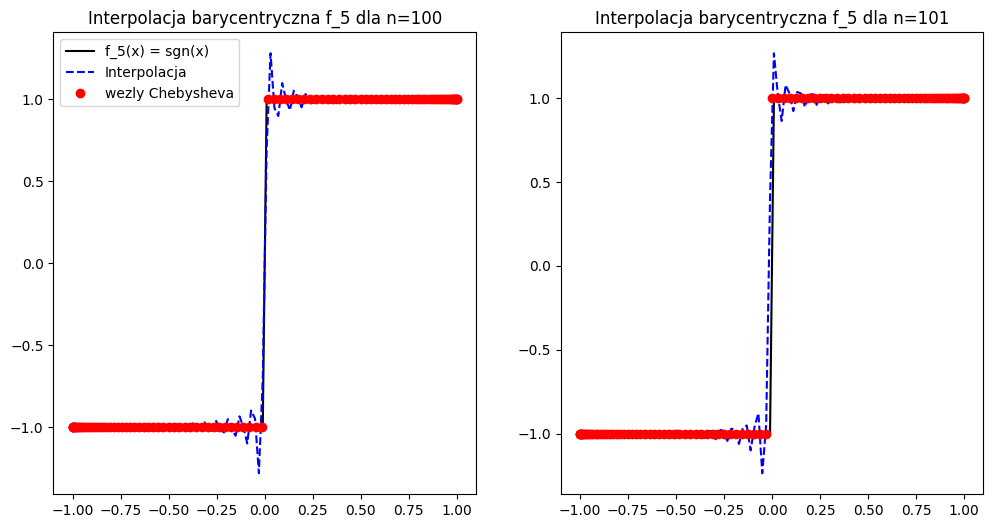

Minimalny blad dla n parzystych: 0.30242866351948483
Minimalny blad dla n nieparzystych: 1.4081384967447674


In [ ]:
reload(main)
x_f5 = np.linspace(-1,1,100)
y_f5 = main.f_5(x)
n_walues = [4,10,50,100]
even = []
odd = []

for n in n_walues:
    x_cheb = main.chebyshev_nodes(n)
    y_cheb = main.f_5(x_cheb)
    cheb_bar = main.bar_cheb_weights(n)
    y_interpolated = main.barycentric_inte(x_cheb, y_cheb, cheb_bar, x_f5)
    L_inf = main.L_inf(y_f5, y_interpolated)

    even.append(L_inf)
    
    plt.figure( figsize=(12,6) )
    plt.subplot(1,2,1)
    plt.plot(x_f5, y_f5 , label="f_5(x) = sgn(x)", color = 'black')
    plt.plot(x_f5, y_interpolated, 'b--',label="Interpolacja")
    plt.plot(x_cheb, y_cheb, 'ro', label="wezly Chebysheva")
    plt.title("Interpolacja barycentryczna f_5 dla n={}".format(n))
    plt.legend()

    x_cheb = main.chebyshev_nodes(n + 1)
    y_cheb = main.f_5(x_cheb)
    cheb_bar = main.bar_cheb_weights(n + 1)
    y_interpolated = main.barycentric_inte(x_cheb, y_cheb, cheb_bar, x_f5)
    L_inf = main.L_inf(y_f5, y_interpolated)

    odd.append(L_inf)

    plt.subplot(1,2,2)
    plt.plot(x_f5, y_f5 , label="f_5(x) = sgn(x)", color = 'black')
    plt.plot(x_f5, y_interpolated, 'b--',label="Interpolacja")
    plt.plot(x_cheb, y_cheb, 'ro', label="wezly Chebysheva")
    plt.title("Interpolacja barycentryczna f_5 dla n={}".format(n+1))
    plt.show()

print("Minimalny blad dla n parzystych:", min(even))
print("Minimalny blad dla n nieparzystych:", min(odd))

Dla nieparzystego n węzły Czebyszewa zawierają punkt 0, czyli dokładnie trafia w wartość w miejscu skoku. Dla parzystego n punkt 0 leży między węzłami, dlatego skok musi zostać odtworzony na odcinku. Z tych powodów błąd dla n parzystych jest niemal 5 razy mniejszy niż dla nieparzystych. Wiąże się to z istnieniem efektu Gibbsa, czyli charakterystycznych oscylacji pojawiających się w interpolacji funkcji nieciągłych.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)